In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
comm_data=pd.read_json("/users/rajandeepkaur/Desktop/SFU/CMPT353/Project-Reddit/reddit/data/comments_merged.json",lines=True)

In [3]:
toplist=pd.read_csv("/users/rajandeepkaur/Desktop/SFU/CMPT353/Project-Reddit/reddit/toplist/toplist.csv", names=['author'])

In [4]:
author_list=toplist['author'].tolist()
print(author_list)

['curiousincident', 'mckulty', 'm50d', 'DontPressAltF4', 'kickstand', 'localoptom', 'PFlat2', 'baiser', 'tejaco', 'maryfamilyresearch']


In [5]:
comm_data= comm_data[comm_data['author'].isin(author_list)]

In [6]:
comm_data

,author,body,controversiality,created_utc,edited,gilded,id,link_id,parent_id,retrieved_on,...,subreddit,subreddit_id,month,author_flair_text,author_flair_css_class,archived,name,score_hidden,distinguished,year
95,mckulty,"One eye got a bigger drop, or one eye watered ...",0,1624440937,false,0,h2r1eas,NaN,t3_o64ucg,NaN,...,optometry,t5_2shdt,6,NaN,NaN,0.0,t1_h2r1eas,0.0,NaN,NaN
146,kickstand,Does it do what you want? It doesn't have 4k v...,0,1508936736,false,0,dov578w,t3_78mh4s,t3_78mh4s,1.510168e+09,...,Cameras,t5_2r7pa,10,Canon 6D | Sony a6000,other,NaN,NaN,NaN,NaN,2017.0
149,localoptom,Sounds to me like you've been undercorrected i...,0,1508937139,false,0,dov5hf3,t3_78lzke,t3_78lzke,1.510168e+09,...,optometry,t5_2shdt,10,OD,,NaN,NaN,NaN,NaN,2017.0
154,baiser,"&gt; ather's side, I found the ship manifest w...",0,1508937616,false,0,dov5u10,t3_788fem,t1_doua0ly,1.510168e+09,...,Genealogy,t5_2qmdf,10,Mainly just luck,,NaN,NaN,NaN,NaN,2017.0
156,baiser,I love stories like this. Sometimes it just t...,0,1508937661,false,0,dov5v7q,t3_788fem,t1_dou9qbv,1.510168e+09,...,Genealogy,t5_2qmdf,10,Mainly just luck,,NaN,NaN,NaN,NaN,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897885,maryfamilyresearch,"Consider that the name might have been ""Stör""...",0,1611851243,false,0,gl406rz,NaN,t3_l6j37k,1.622275e+09,...,Genealogy,t5_2qmdf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897972,kickstand,If you want a smartphone with telephoto capabi...,0,1611843187,false,0,gl398x0,NaN,t3_l6rq4h,1.622262e+09,...,Cameras,t5_2r7pa,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897981,baiser,"The age actually says 26, not 16. I'll be hon...",0,1611846738,false,0,gl3lcyg,NaN,t1_gl1stbe,1.622268e+09,...,Genealogy,t5_2qmdf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897997,baiser,"Rule #2 of this subreddit, buddy: **Treat peop...",0,1611847761,1611891511,0,gl3p2ex,NaN,t1_gl2w8wo,1.622270e+09,...,Genealogy,t5_2qmdf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
comm_data=comm_data.dropna(subset=['year'])

In [8]:
grouped= comm_data.groupby(['month','author']).size().reset_index(name='count')
grouped2= comm_data.groupby(['month']).size().reset_index(name='count')

In [9]:
print(grouped)
print(grouped2)

     month              author  count
0        1      DontPressAltF4     58
1        1              baiser     12
2        1     curiousincident    116
3        1           kickstand     50
4        1          localoptom     43
..     ...                 ...    ...
111     12          localoptom    110
112     12                m50d     24
113     12  maryfamilyresearch     18
114     12             mckulty    103
115     12              tejaco     46

[116 rows x 3 columns]
    month  count
0       1    535
1       2    596
2       3    799
3       4    786
4       5    811
5       6    794
6       7    735
7       8    695
8       9    718
9      10    775
10     11    622
11     12    705


<Axes: xlabel='month', ylabel='count'>

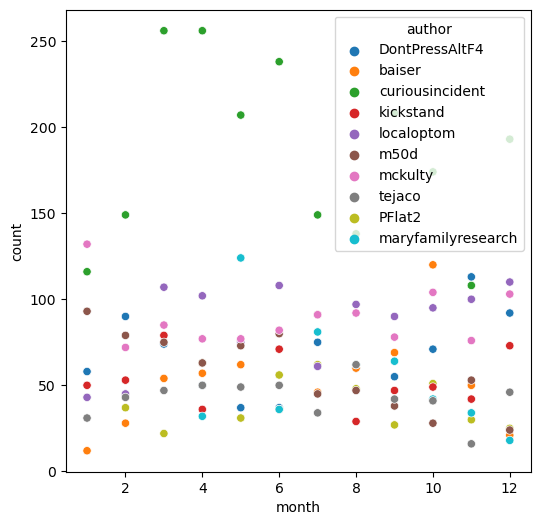

In [15]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='month',y='count',hue='author', data=grouped)

In [11]:
formula = 'count  ~ C(month) + C(author)'

In [12]:
model=ols(formula, grouped).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     13.32
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.56e-19
Time:                        00:59:31   Log-Likelihood:                -534.87
No. Observations:                 116   AIC:                             1112.
Df Residuals:                      95   BIC:                             1170.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          55.1042     11.964      4.606      0.000      31.352      78.856
C(month)[T.2]                       3.7348     13.103      0.285      0.776     -22.277      29.747
C(month)[T.3]                      26.2904     13.103      2.006      0.048       0.278      52.302
C(month)[T.4]                      18.2250     12.827      1.421      0.159      -7.240      43.690
C(month)[T.5]                      20.7250     12.827      1.616      0.109      -4.740      46.190
C(month)[T.6]                      19.0250     12.827      1.483      0.141      -6.440      44.490
C(month)[T.7]                      13.1250     12.827      1.023      0.309     -12.340      38.590
C(month)[T.8]                       9.1250     12.827      0.711      0.479     -16.340      34.590
C(month)[T.9]                      11.4250     12.827      0.891      0.375     -14.040      36.890
C(month)[T.10]                     17.1250     12.827      1.335      0.185      -8.340      42.590
C(month)[T.11]                      1.8250     12.827      0.142      0.887     -23.640      27.290
C(month)[T.12]                     10.1250     12.827      0.789      0.432     -15.340      35.590
C(author)[T.PFlat2]               -27.7178     11.256     -2.462      0.016     -50.064      -5.371
C(author)[T.baiser]               -16.4167     10.979     -1.495      0.138     -38.213       5.380
C(author)[T.curiousincident]      115.0000     10.979     10.474      0.000      93.204     136.796
C(author)[T.kickstand]             -9.6667     10.979     -0.880      0.381     -31.463      12.130
C(author)[T.localoptom]            18.4167     10.979      1.677      0.097      -3.380      40.213
C(author)[T.m50d]                  -9.5000     10.979     -0.865      0.389     -31.296      12.296
C(author)[T.maryfamilyresearch]   -13.7402     11.956     -1.149      0.253     -37.475       9.995
C(author)[T.mckulty]               21.4167     10.979      1.951      0.054      -0.380      43.213
C(author)[T.tejaco]               -25.0833     10.979     -2.285      0.025     -46.880      -3.287
==============================================================================
Omnibus:                        6.352   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.942
Skew:                           0.456   Prob(JB):                       0.0513
Kurtosis:                       3.631   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from scipy import stats
print(stats.mannwhitneyu(grouped2['month'], grouped2['count']).pvalue)

3.6584553538971e-05
